<a href="https://colab.research.google.com/github/owl-d/Network/blob/main/CIFAR_10_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#1) Load the Packages

import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import maxnorm
from keras import regularizers

import matplotlib.pyplot as plt
from PIL import Image

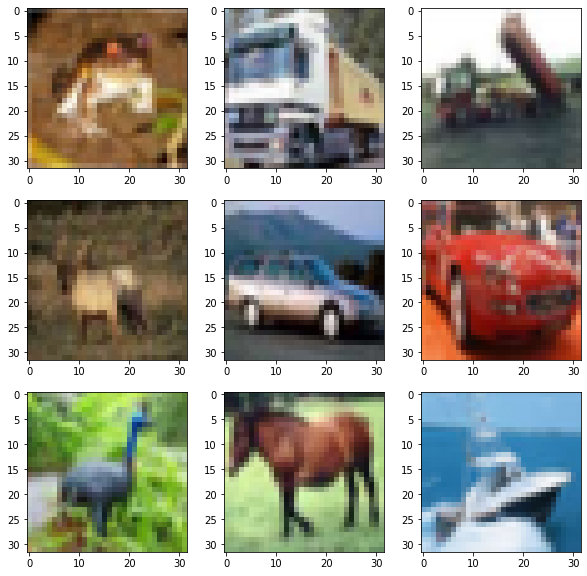

In [13]:
#2) Define the datasets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.imshow(Image.fromarray(x_train[i]))
    
rnd_seed = 3
np.random.seed(rnd_seed)
width = 32
height = 32
channel = 3
dropout_val = 0.2

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
#3) Make up the Model

model = Sequential()

weight_decay = 1e-4

# First Conv Layers
model.add(Conv2D(32,(3,3), kernel_regularizer=regularizers.l2(weight_decay), input_shape =(width, height, channel), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Second Conv Layers
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third Conv Layers
model.add(Conv2D(96,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(96,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(96,(3,3), kernel_regularizer=regularizers.l2(weight_decay), activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(1024, activation='elu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='elu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)      

In [15]:
#4) Set the learning
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [16]:
#5) Learning

hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 15s 17ms/step - loss: 1.5933 - accuracy: 0.4744 - val_loss: 1.1399 - val_accuracy: 0.6181
Epoch 2/20
782/782 [==============================] - 12s 16ms/step - loss: 1.1207 - accuracy: 0.6266 - val_loss: 0.9075 - val_accuracy: 0.7064
Epoch 3/20
782/782 [==============================] - 13s 17ms/step - loss: 0.9279 - accuracy: 0.6929 - val_loss: 0.8645 - val_accuracy: 0.7190
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 0.7900 - accuracy: 0.7451 - val_loss: 0.7282 - val_accuracy: 0.7655
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 0.6967 - accuracy: 0.7751 - val_loss: 0.7243 - val_accuracy: 0.7687
Epoch 6/20
782/782 [==============================] - 13s 16ms/step - loss: 0.6168 - accuracy: 0.8040 - val_loss: 0.6614 - val_accuracy: 0.7969
Epoch 7/20
782/782 [==============================] - 12s 16ms/step - loss: 0.5508 - accuracy: 0.8280 - val_loss: 0.6655 - val_accuracy:

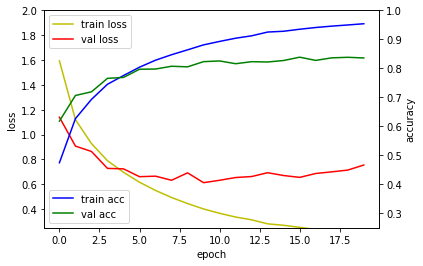

In [17]:
#6) Check the learning process
%matplotlib inline
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.25, 2.0])
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.25, 1.0])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
#7) Evaluate model
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 2s 5ms/step - loss: 0.7552 - accuracy: 0.8358
## evaluation loss and metrics ##
[0.7552422285079956, 0.8357999920845032]


In [19]:
#8) Predict with the model
yhat = model.predict(x_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step


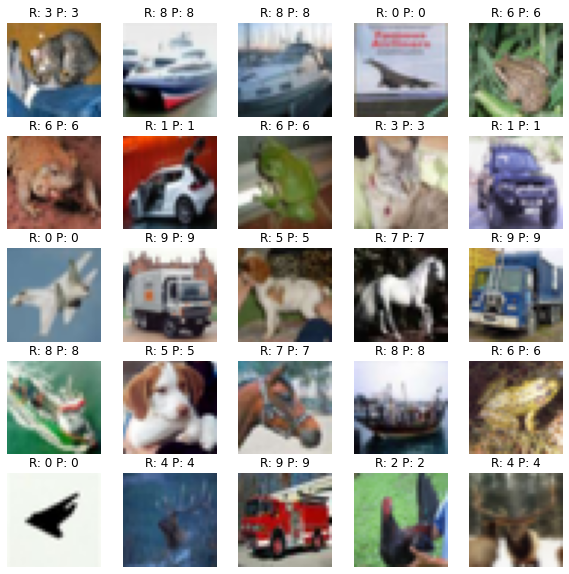

In [20]:
#9) Visualize CIFAR-10 image
plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"]=(10,10)
f, axarr = plt.subplots(plt_row, plt_col)
cnt = 0
i = 0

while cnt<(plt_row*plt_col):
    if np.argmax(y_test[i]) != np.argmax(yhat[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height, channel))
    sub_plt_title = 'R: '+str(np.argmax(y_test[i])) + ' P: '+str(np.argmax(yhat[i]))
    sub_plt.set_title(sub_plt_title)
    #Image.fromarray(x_train[i])
    i+=1
    cnt+=1
    
plt.show()

In [21]:
#10) Save the model
model.save('doyu_CIFAR.h5')